In [7]:
from funcionalidades import backend

In [8]:
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/02/ata-r.soleneordinaria-05-02-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/02/ata-r.o.-12-02-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.o.-19-02-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.o.-26-02-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.o.-12-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.extraordinaria-15-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-19-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-26-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-02-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-09-04-19.pdf"
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-16-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-23-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-30-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-07-05-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-14-05-19-1.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/mae-destaque-nova-limense-16-05-2019-3.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-21-05-19-1.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-28-05-19-1.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-04-06-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-11-06-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/07/ata-r.o.-18-06-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/07/ata-r.o.-25-06-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/08/ata-r.o.-02-07-19.pdf"


#"Ata: ['-r.o.-25-06-19.pdf'] NumeroPaginas: 26"       
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/07/ata-r.o.-25-06-19.pdf"
    
    
#"Ata: ['-r.o.-28-05-19-1.pdf'] NumeroPaginas: 28"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-28-05-19-1.pdf"


#"Ata: ['-r.o.-23-04-19.pdf'] NumeroPaginas: 26"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-23-04-19.pdf" 
    
    
#"Ata: ['-r.o.-11-06-19.pdf'] NumeroPaginas: 1"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-11-06-19.pdf"
    
#"Ata: ['-r.o.-02-04-19.pdf'] NumeroPaginas: 1"
#url= "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-02-04-19.pdf"    
    
#"Ata: ['-r.o.-12-02-19.pdf'] NumeroPaginas: 1
url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/02/ata-r.o.-12-02-19.pdf"
    


#### Obteção de Dados

In [9]:
text = backend.extrair_texto_pdf(url)

#### Nuvem de palavras 
#### Sem filtro

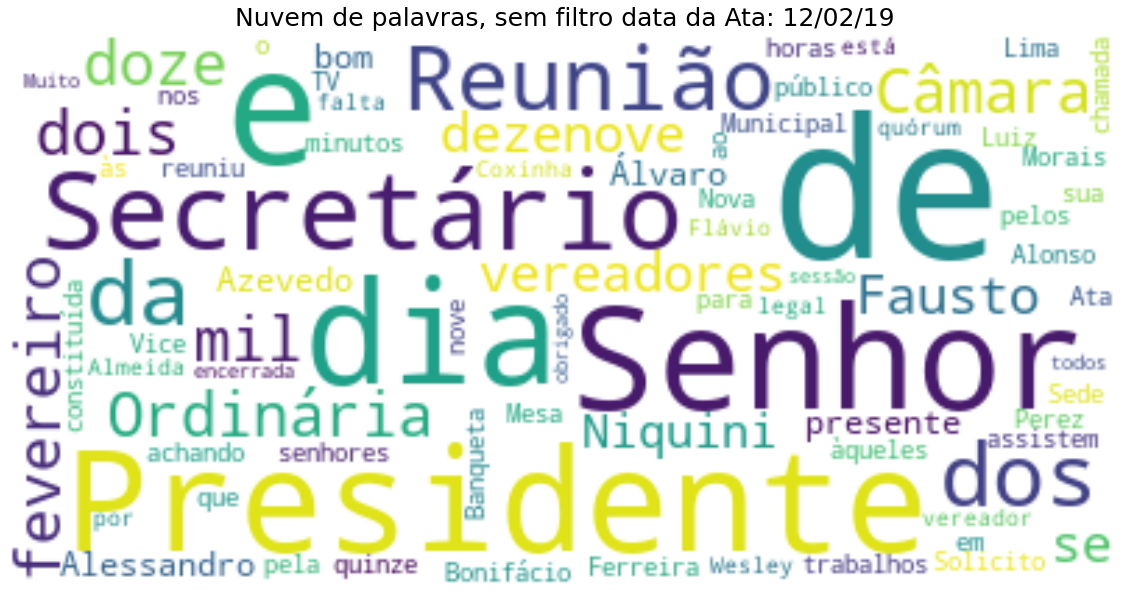

In [10]:
backend.nuvem_palavras(text,  f"Nuvem de palavras, sem filtro data da Ata: {backend.data_reuniao(url)}")

#### Filtragem de palavras

In [11]:
resultado = backend.filtos(text)

#### Tabulação de dados 

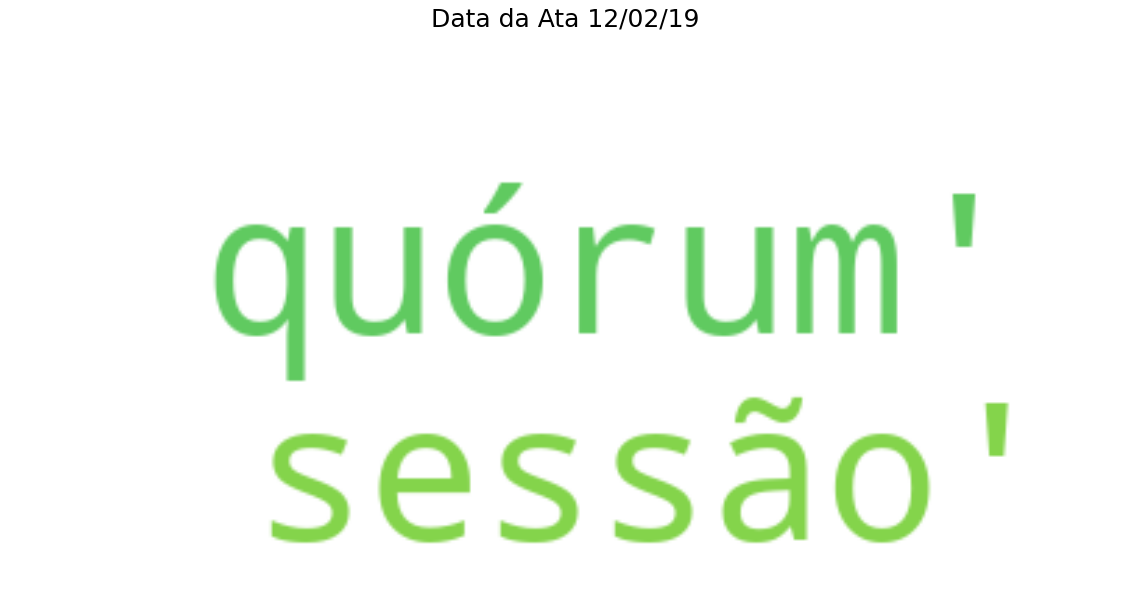

Data da reunião: 12/02/19
Número de Vereadores presentes: 4 
Número de Vereadores ausentes: 6 
Lista com os Vereadores Presentes: ['Alessandro Luiz Bonifácio', 'Fausto Niquini Ferreira', 'Wesley de Jesus Silva', 'Álvaro Alonso Perez Morais de Azevedo']
Houve Reunião: Não
Palavras mais frequêntes:['quórum', 'sessão']


['quórum',
 'substantivo masculino Número mínimo de pessoas para que se inicie uma votação: o projeto não passou no senado por ausência de quórum.[Gramática] Palavra aportuguesada do latim quorum, plural de qui, com sentido de "dos quais".Etimologia (origem da palavra quórum). Do latim quorum.',
 'sessão',
 'substantivo feminino Tempo de duração de uma reunião em assembleia ou congresso; essa própria reunião: sessão extraordinária; sessão política.Período de tempo em que uma atividade é realizada: precisava de duas sessões para terminar a pintura.Tempo de duração de um espetáculo, programa, cinema etc.Encontro entre o paciente e seu analista: sessão de terapia.[Religião] Reunião que ocorre num centro espírita; sessão espírita.Etimologia (origem da palavra sessão). Do latim sessio.onis.']

In [12]:
backend.nuvem_palavras(resultado,  f"Data da Ata {backend.data_reuniao(url)}")
print(f"Data da reunião: {backend.data_reuniao(url)}")
backend.dados_ata(text)
pesquisar = backend.palavras_frequentes(resultado)
print(f"Palavras mais frequêntes:{pesquisar}")
backend.diconario(pesquisar)